In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

from torch.autograd import Function
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os
import random
from PIL import Image

from skimage.io import imsave, imread
from skimage.transform import resize
from skimage.transform import rotate

In [2]:
!pip install kaggle-cli

!kg download -u kaggle_username -p your_kaggle_password -c ultrasound-nerve-segmentation -f 'train.zip'

    100% |████████████████████████████████| 71kB 2.6MB/s ta 0:00:01
    100% |████████████████████████████████| 6.8MB 215kB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 2.5MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 12.0MB/s a 0:00:01
    100% |████████████████████████████████| 92kB 11.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for kaggle-cli ... done
  Stored in directory: /root/.cache/pip/wheels/49/4c/0c/f8d4635c9ca30f65272fc3ee31dec80b2c9086283b39d22f61
  Running setup.py bdist_wheel for PrettyTable ... done
  Stored in directory: /root/.cache/pip/wheels/b6/90/7b/1c22b89217d0eba6d5f406e562365ebee804f0d4595b2bdbcd
  Running setup.py bdist_wheel for unicodecsv ... done
  Stored in directory: /root/.cache/pip/wheels/97/e2/16/219fa93b83edaff912b6805cfa19d0597e21f8d353f3e2d22f
  Running setup.py bdist_wheel for cmd2 ... done
  Stored in directory: /root/.cache/pip/wheels/aa/51/63/dfeef1471ea77d2e622021366ff563e07d5e95a502eb3eb19a
  Running se

In [3]:
!unzip train.zip -d data

Archive:  train.zip
   creating: data/train/
  inflating: data/train/10_1.tif     
  inflating: data/train/10_10.tif    
  inflating: data/train/10_100.tif   
  inflating: data/train/10_100_mask.tif  
  inflating: data/train/10_101.tif   
  inflating: data/train/10_101_mask.tif  
  inflating: data/train/10_102.tif   
  inflating: data/train/10_102_mask.tif  
  inflating: data/train/10_103.tif   
  inflating: data/train/10_103_mask.tif  
  inflating: data/train/10_104.tif   
  inflating: data/train/10_104_mask.tif  
  inflating: data/train/10_105.tif   
  inflating: data/train/10_105_mask.tif  
  inflating: data/train/10_106.tif   
  inflating: data/train/10_106_mask.tif  
  inflating: data/train/10_107.tif   
  inflating: data/train/10_107_mask.tif  
  inflating: data/train/10_108.tif   
  inflating: data/train/10_108_mask.tif  
  inflating: data/train/10_109.tif   
  inflating: data/train/10_109_mask.tif  
  inflating: data/train/10_10_mask.tif  
  inflating: data/train/10_11.tif    


  inflating: data/train/10_84_mask.tif  
  inflating: data/train/10_85.tif    
  inflating: data/train/10_85_mask.tif  
  inflating: data/train/10_86.tif    
  inflating: data/train/10_86_mask.tif  
  inflating: data/train/10_87.tif    
  inflating: data/train/10_87_mask.tif  
  inflating: data/train/10_88.tif    
  inflating: data/train/10_88_mask.tif  
  inflating: data/train/10_89.tif    
  inflating: data/train/10_89_mask.tif  
  inflating: data/train/10_8_mask.tif  
  inflating: data/train/10_9.tif     
  inflating: data/train/10_90.tif    
  inflating: data/train/10_90_mask.tif  
  inflating: data/train/10_91.tif    
  inflating: data/train/10_91_mask.tif  
  inflating: data/train/10_92.tif    
  inflating: data/train/10_92_mask.tif  
  inflating: data/train/10_93.tif    
  inflating: data/train/10_93_mask.tif  
  inflating: data/train/10_94.tif    
  inflating: data/train/10_94_mask.tif  
  inflating: data/train/10_95.tif    
  inflating: data/train/10_95_mask.tif  
  inflating:

  inflating: data/train/12_55.tif    
  inflating: data/train/12_55_mask.tif  
  inflating: data/train/12_56.tif    
  inflating: data/train/12_56_mask.tif  
  inflating: data/train/12_57.tif    
  inflating: data/train/12_57_mask.tif  
  inflating: data/train/12_58.tif    
  inflating: data/train/12_58_mask.tif  
  inflating: data/train/12_59.tif    
  inflating: data/train/12_59_mask.tif  
  inflating: data/train/12_5_mask.tif  
  inflating: data/train/12_6.tif     
  inflating: data/train/12_60.tif    
  inflating: data/train/12_60_mask.tif  
  inflating: data/train/12_61.tif    
  inflating: data/train/12_61_mask.tif  
  inflating: data/train/12_62.tif    
  inflating: data/train/12_62_mask.tif  
  inflating: data/train/12_63.tif    
  inflating: data/train/12_63_mask.tif  
  inflating: data/train/12_64.tif    
  inflating: data/train/12_64_mask.tif  
  inflating: data/train/12_65.tif    
  inflating: data/train/12_65_mask.tif  
  inflating: data/train/12_66.tif    
  inflating: da

  inflating: data/train/14_25.tif    
  inflating: data/train/14_25_mask.tif  
  inflating: data/train/14_26.tif    
  inflating: data/train/14_26_mask.tif  
  inflating: data/train/14_27.tif    
  inflating: data/train/14_27_mask.tif  
  inflating: data/train/14_28.tif    
  inflating: data/train/14_28_mask.tif  
  inflating: data/train/14_29.tif    
  inflating: data/train/14_29_mask.tif  
  inflating: data/train/14_2_mask.tif  
  inflating: data/train/14_3.tif     
  inflating: data/train/14_30.tif    
  inflating: data/train/14_30_mask.tif  
  inflating: data/train/14_31.tif    
  inflating: data/train/14_31_mask.tif  
  inflating: data/train/14_32.tif    
  inflating: data/train/14_32_mask.tif  
  inflating: data/train/14_33.tif    
  inflating: data/train/14_33_mask.tif  
  inflating: data/train/14_34.tif    
  inflating: data/train/14_34_mask.tif  
  inflating: data/train/14_35.tif    
  inflating: data/train/14_35_mask.tif  
  inflating: data/train/14_36.tif    
  inflating: da

  inflating: data/train/16_104.tif   
  inflating: data/train/16_104_mask.tif  
  inflating: data/train/16_105.tif   
  inflating: data/train/16_105_mask.tif  
  inflating: data/train/16_106.tif   
  inflating: data/train/16_106_mask.tif  
  inflating: data/train/16_107.tif   
  inflating: data/train/16_107_mask.tif  
  inflating: data/train/16_108.tif   
  inflating: data/train/16_108_mask.tif  
  inflating: data/train/16_109.tif   
  inflating: data/train/16_109_mask.tif  
  inflating: data/train/16_10_mask.tif  
  inflating: data/train/16_11.tif    
  inflating: data/train/16_110.tif   
  inflating: data/train/16_110_mask.tif  
  inflating: data/train/16_111.tif   
  inflating: data/train/16_111_mask.tif  
  inflating: data/train/16_112.tif   
  inflating: data/train/16_112_mask.tif  
  inflating: data/train/16_113.tif   
  inflating: data/train/16_113_mask.tif  
  inflating: data/train/16_114.tif   
  inflating: data/train/16_114_mask.tif  
  inflating: data/train/16_115.tif   
  i

  inflating: data/train/16_9.tif     
  inflating: data/train/16_90.tif    
  inflating: data/train/16_90_mask.tif  
  inflating: data/train/16_91.tif    
  inflating: data/train/16_91_mask.tif  
  inflating: data/train/16_92.tif    
  inflating: data/train/16_92_mask.tif  
  inflating: data/train/16_93.tif    
  inflating: data/train/16_93_mask.tif  
  inflating: data/train/16_94.tif    
  inflating: data/train/16_94_mask.tif  
  inflating: data/train/16_95.tif    
  inflating: data/train/16_95_mask.tif  
  inflating: data/train/16_96.tif    
  inflating: data/train/16_96_mask.tif  
  inflating: data/train/16_97.tif    
  inflating: data/train/16_97_mask.tif  
  inflating: data/train/16_98.tif    
  inflating: data/train/16_98_mask.tif  
  inflating: data/train/16_99.tif    
  inflating: data/train/16_99_mask.tif  
  inflating: data/train/16_9_mask.tif  
  inflating: data/train/17_1.tif     
  inflating: data/train/17_10.tif    
  inflating: data/train/17_100.tif   
  inflating: data/

  inflating: data/train/17_76_mask.tif  
  inflating: data/train/17_77.tif    
  inflating: data/train/17_77_mask.tif  
  inflating: data/train/17_78.tif    
  inflating: data/train/17_78_mask.tif  
  inflating: data/train/17_79.tif    
  inflating: data/train/17_79_mask.tif  
  inflating: data/train/17_7_mask.tif  
  inflating: data/train/17_8.tif     
  inflating: data/train/17_80.tif    
  inflating: data/train/17_80_mask.tif  
  inflating: data/train/17_81.tif    
  inflating: data/train/17_81_mask.tif  
  inflating: data/train/17_82.tif    
  inflating: data/train/17_82_mask.tif  
  inflating: data/train/17_83.tif    
  inflating: data/train/17_83_mask.tif  
  inflating: data/train/17_84.tif    
  inflating: data/train/17_84_mask.tif  
  inflating: data/train/17_85.tif    
  inflating: data/train/17_85_mask.tif  
  inflating: data/train/17_86.tif    
  inflating: data/train/17_86_mask.tif  
  inflating: data/train/17_87.tif    
  inflating: data/train/17_87_mask.tif  
  inflating:

  inflating: data/train/19_46_mask.tif  
  inflating: data/train/19_47.tif    
  inflating: data/train/19_47_mask.tif  
  inflating: data/train/19_48.tif    
  inflating: data/train/19_48_mask.tif  
  inflating: data/train/19_49.tif    
  inflating: data/train/19_49_mask.tif  
  inflating: data/train/19_4_mask.tif  
  inflating: data/train/19_5.tif     
  inflating: data/train/19_50.tif    
  inflating: data/train/19_50_mask.tif  
  inflating: data/train/19_51.tif    
  inflating: data/train/19_51_mask.tif  
  inflating: data/train/19_52.tif    
  inflating: data/train/19_52_mask.tif  
  inflating: data/train/19_53.tif    
  inflating: data/train/19_53_mask.tif  
  inflating: data/train/19_54.tif    
  inflating: data/train/19_54_mask.tif  
  inflating: data/train/19_55.tif    
  inflating: data/train/19_55_mask.tif  
  inflating: data/train/19_56.tif    
  inflating: data/train/19_56_mask.tif  
  inflating: data/train/19_57.tif    
  inflating: data/train/19_57_mask.tif  
  inflating:

  inflating: data/train/20_18.tif    
  inflating: data/train/20_18_mask.tif  
  inflating: data/train/20_19.tif    
  inflating: data/train/20_19_mask.tif  
  inflating: data/train/20_1_mask.tif  
  inflating: data/train/20_2.tif     
  inflating: data/train/20_20.tif    
  inflating: data/train/20_20_mask.tif  
  inflating: data/train/20_21.tif    
  inflating: data/train/20_21_mask.tif  
  inflating: data/train/20_22.tif    
  inflating: data/train/20_22_mask.tif  
  inflating: data/train/20_23.tif    
  inflating: data/train/20_23_mask.tif  
  inflating: data/train/20_24.tif    
  inflating: data/train/20_24_mask.tif  
  inflating: data/train/20_25.tif    
  inflating: data/train/20_25_mask.tif  
  inflating: data/train/20_26.tif    
  inflating: data/train/20_26_mask.tif  
  inflating: data/train/20_27.tif    
  inflating: data/train/20_27_mask.tif  
  inflating: data/train/20_28.tif    
  inflating: data/train/20_28_mask.tif  
  inflating: data/train/20_29.tif    
  inflating: da

  inflating: data/train/21_97.tif    
  inflating: data/train/21_97_mask.tif  
  inflating: data/train/21_98.tif    
  inflating: data/train/21_98_mask.tif  
  inflating: data/train/21_99.tif    
  inflating: data/train/21_99_mask.tif  
  inflating: data/train/21_9_mask.tif  
  inflating: data/train/22_1.tif     
  inflating: data/train/22_10.tif    
  inflating: data/train/22_100.tif   
  inflating: data/train/22_100_mask.tif  
  inflating: data/train/22_101.tif   
  inflating: data/train/22_101_mask.tif  
  inflating: data/train/22_102.tif   
  inflating: data/train/22_102_mask.tif  
  inflating: data/train/22_103.tif   
  inflating: data/train/22_103_mask.tif  
  inflating: data/train/22_104.tif   
  inflating: data/train/22_104_mask.tif  
  inflating: data/train/22_105.tif   
  inflating: data/train/22_105_mask.tif  
  inflating: data/train/22_106.tif   
  inflating: data/train/22_106_mask.tif  
  inflating: data/train/22_107.tif   
  inflating: data/train/22_107_mask.tif  
  infla

  inflating: data/train/22_82.tif    
  inflating: data/train/22_82_mask.tif  
  inflating: data/train/22_83.tif    
  inflating: data/train/22_83_mask.tif  
  inflating: data/train/22_84.tif    
  inflating: data/train/22_84_mask.tif  
  inflating: data/train/22_85.tif    
  inflating: data/train/22_85_mask.tif  
  inflating: data/train/22_86.tif    
  inflating: data/train/22_86_mask.tif  
  inflating: data/train/22_87.tif    
  inflating: data/train/22_87_mask.tif  
  inflating: data/train/22_88.tif    
  inflating: data/train/22_88_mask.tif  
  inflating: data/train/22_89.tif    
  inflating: data/train/22_89_mask.tif  
  inflating: data/train/22_8_mask.tif  
  inflating: data/train/22_9.tif     
  inflating: data/train/22_90.tif    
  inflating: data/train/22_90_mask.tif  
  inflating: data/train/22_91.tif    
  inflating: data/train/22_91_mask.tif  
  inflating: data/train/22_92.tif    
  inflating: data/train/22_92_mask.tif  
  inflating: data/train/22_93.tif    
  inflating: da

  inflating: data/train/23_68.tif    
  inflating: data/train/23_68_mask.tif  
  inflating: data/train/23_69.tif    
  inflating: data/train/23_69_mask.tif  
  inflating: data/train/23_6_mask.tif  
  inflating: data/train/23_7.tif     
  inflating: data/train/23_70.tif    
  inflating: data/train/23_70_mask.tif  
  inflating: data/train/23_71.tif    
  inflating: data/train/23_71_mask.tif  
  inflating: data/train/23_72.tif    
  inflating: data/train/23_72_mask.tif  
  inflating: data/train/23_73.tif    
  inflating: data/train/23_73_mask.tif  
  inflating: data/train/23_74.tif    
  inflating: data/train/23_74_mask.tif  
  inflating: data/train/23_75.tif    
  inflating: data/train/23_75_mask.tif  
  inflating: data/train/23_76.tif    
  inflating: data/train/23_76_mask.tif  
  inflating: data/train/23_77.tif    
  inflating: data/train/23_77_mask.tif  
  inflating: data/train/23_78.tif    
  inflating: data/train/23_78_mask.tif  
  inflating: data/train/23_79.tif    
  inflating: da

  inflating: data/train/25_38.tif    
  inflating: data/train/25_38_mask.tif  
  inflating: data/train/25_39.tif    
  inflating: data/train/25_39_mask.tif  
  inflating: data/train/25_3_mask.tif  
  inflating: data/train/25_4.tif     
  inflating: data/train/25_40.tif    
  inflating: data/train/25_40_mask.tif  
  inflating: data/train/25_41.tif    
  inflating: data/train/25_41_mask.tif  
  inflating: data/train/25_42.tif    
  inflating: data/train/25_42_mask.tif  
  inflating: data/train/25_43.tif    
  inflating: data/train/25_43_mask.tif  
  inflating: data/train/25_44.tif    
  inflating: data/train/25_44_mask.tif  
  inflating: data/train/25_45.tif    
  inflating: data/train/25_45_mask.tif  
  inflating: data/train/25_46.tif    
  inflating: data/train/25_46_mask.tif  
  inflating: data/train/25_47.tif    
  inflating: data/train/25_47_mask.tif  
  inflating: data/train/25_48.tif    
  inflating: data/train/25_48_mask.tif  
  inflating: data/train/25_49.tif    
  inflating: da

  inflating: data/train/26_23.tif    
  inflating: data/train/26_23_mask.tif  
  inflating: data/train/26_24.tif    
  inflating: data/train/26_24_mask.tif  
  inflating: data/train/26_25.tif    
  inflating: data/train/26_25_mask.tif  
  inflating: data/train/26_26.tif    
  inflating: data/train/26_26_mask.tif  
  inflating: data/train/26_27.tif    
  inflating: data/train/26_27_mask.tif  
  inflating: data/train/26_28.tif    
  inflating: data/train/26_28_mask.tif  
  inflating: data/train/26_29.tif    
  inflating: data/train/26_29_mask.tif  
  inflating: data/train/26_2_mask.tif  
  inflating: data/train/26_3.tif     
  inflating: data/train/26_30.tif    
  inflating: data/train/26_30_mask.tif  
  inflating: data/train/26_31.tif    
  inflating: data/train/26_31_mask.tif  
  inflating: data/train/26_32.tif    
  inflating: data/train/26_32_mask.tif  
  inflating: data/train/26_33.tif    
  inflating: data/train/26_33_mask.tif  
  inflating: data/train/26_34.tif    
  inflating: da

  inflating: data/train/28_101_mask.tif  
  inflating: data/train/28_102.tif   
  inflating: data/train/28_102_mask.tif  
  inflating: data/train/28_103.tif   
  inflating: data/train/28_103_mask.tif  
  inflating: data/train/28_104.tif   
  inflating: data/train/28_104_mask.tif  
  inflating: data/train/28_105.tif   
  inflating: data/train/28_105_mask.tif  
  inflating: data/train/28_106.tif   
  inflating: data/train/28_106_mask.tif  
  inflating: data/train/28_107.tif   
  inflating: data/train/28_107_mask.tif  
  inflating: data/train/28_108.tif   
  inflating: data/train/28_108_mask.tif  
  inflating: data/train/28_109.tif   
  inflating: data/train/28_109_mask.tif  
  inflating: data/train/28_10_mask.tif  
  inflating: data/train/28_11.tif    
  inflating: data/train/28_110.tif   
  inflating: data/train/28_110_mask.tif  
  inflating: data/train/28_111.tif   
  inflating: data/train/28_111_mask.tif  
  inflating: data/train/28_112.tif   
  inflating: data/train/28_112_mask.tif  

  inflating: data/train/29_72.tif    
  inflating: data/train/29_72_mask.tif  
  inflating: data/train/29_73.tif    
  inflating: data/train/29_73_mask.tif  
  inflating: data/train/29_74.tif    
  inflating: data/train/29_74_mask.tif  
  inflating: data/train/29_75.tif    
  inflating: data/train/29_75_mask.tif  
  inflating: data/train/29_76.tif    
  inflating: data/train/29_76_mask.tif  
  inflating: data/train/29_77.tif    
  inflating: data/train/29_77_mask.tif  
  inflating: data/train/29_78.tif    
  inflating: data/train/29_78_mask.tif  
  inflating: data/train/29_79.tif    
  inflating: data/train/29_79_mask.tif  
  inflating: data/train/29_7_mask.tif  
  inflating: data/train/29_8.tif     
  inflating: data/train/29_80.tif    
  inflating: data/train/29_80_mask.tif  
  inflating: data/train/29_81.tif    
  inflating: data/train/29_81_mask.tif  
  inflating: data/train/29_82.tif    
  inflating: data/train/29_82_mask.tif  
  inflating: data/train/29_83.tif    
  inflating: da

  inflating: data/train/30_43.tif    
  inflating: data/train/30_43_mask.tif  
  inflating: data/train/30_44.tif    
  inflating: data/train/30_44_mask.tif  
  inflating: data/train/30_45.tif    
  inflating: data/train/30_45_mask.tif  
  inflating: data/train/30_46.tif    
  inflating: data/train/30_46_mask.tif  
  inflating: data/train/30_47.tif    
  inflating: data/train/30_47_mask.tif  
  inflating: data/train/30_48.tif    
  inflating: data/train/30_48_mask.tif  
  inflating: data/train/30_49.tif    
  inflating: data/train/30_49_mask.tif  
  inflating: data/train/30_4_mask.tif  
  inflating: data/train/30_5.tif     
  inflating: data/train/30_50.tif    
  inflating: data/train/30_50_mask.tif  
  inflating: data/train/30_51.tif    
  inflating: data/train/30_51_mask.tif  
  inflating: data/train/30_52.tif    
  inflating: data/train/30_52_mask.tif  
  inflating: data/train/30_53.tif    
  inflating: data/train/30_53_mask.tif  
  inflating: data/train/30_54.tif    
  inflating: da

  inflating: data/train/32_13_mask.tif  
  inflating: data/train/32_14.tif    
  inflating: data/train/32_14_mask.tif  
  inflating: data/train/32_15.tif    
  inflating: data/train/32_15_mask.tif  
  inflating: data/train/32_16.tif    
  inflating: data/train/32_16_mask.tif  
  inflating: data/train/32_17.tif    
  inflating: data/train/32_17_mask.tif  
  inflating: data/train/32_18.tif    
  inflating: data/train/32_18_mask.tif  
  inflating: data/train/32_19.tif    
  inflating: data/train/32_19_mask.tif  
  inflating: data/train/32_1_mask.tif  
  inflating: data/train/32_2.tif     
  inflating: data/train/32_20.tif    
  inflating: data/train/32_20_mask.tif  
  inflating: data/train/32_21.tif    
  inflating: data/train/32_21_mask.tif  
  inflating: data/train/32_22.tif    
  inflating: data/train/32_22_mask.tif  
  inflating: data/train/32_23.tif    
  inflating: data/train/32_23_mask.tif  
  inflating: data/train/32_24.tif    
  inflating: data/train/32_24_mask.tif  
  inflating:

  inflating: data/train/33_92_mask.tif  
  inflating: data/train/33_93.tif    
  inflating: data/train/33_93_mask.tif  
  inflating: data/train/33_94.tif    
  inflating: data/train/33_94_mask.tif  
  inflating: data/train/33_95.tif    
  inflating: data/train/33_95_mask.tif  
  inflating: data/train/33_96.tif    
  inflating: data/train/33_96_mask.tif  
  inflating: data/train/33_97.tif    
  inflating: data/train/33_97_mask.tif  
  inflating: data/train/33_98.tif    
  inflating: data/train/33_98_mask.tif  
  inflating: data/train/33_99.tif    
  inflating: data/train/33_99_mask.tif  
  inflating: data/train/33_9_mask.tif  
  inflating: data/train/34_1.tif     
  inflating: data/train/34_10.tif    
  inflating: data/train/34_100.tif   
  inflating: data/train/34_100_mask.tif  
  inflating: data/train/34_101.tif   
  inflating: data/train/34_101_mask.tif  
  inflating: data/train/34_102.tif   
  inflating: data/train/34_102_mask.tif  
  inflating: data/train/34_103.tif   
  inflating:

  inflating: data/train/35_64.tif    
  inflating: data/train/35_64_mask.tif  
  inflating: data/train/35_65.tif    
  inflating: data/train/35_65_mask.tif  
  inflating: data/train/35_66.tif    
  inflating: data/train/35_66_mask.tif  
  inflating: data/train/35_67.tif    
  inflating: data/train/35_67_mask.tif  
  inflating: data/train/35_68.tif    
  inflating: data/train/35_68_mask.tif  
  inflating: data/train/35_69.tif    
  inflating: data/train/35_69_mask.tif  
  inflating: data/train/35_6_mask.tif  
  inflating: data/train/35_7.tif     
  inflating: data/train/35_70.tif    
  inflating: data/train/35_70_mask.tif  
  inflating: data/train/35_71.tif    
  inflating: data/train/35_71_mask.tif  
  inflating: data/train/35_72.tif    
  inflating: data/train/35_72_mask.tif  
  inflating: data/train/35_73.tif    
  inflating: data/train/35_73_mask.tif  
  inflating: data/train/35_74.tif    
  inflating: data/train/35_74_mask.tif  
  inflating: data/train/35_75.tif    
  inflating: da

  inflating: data/train/36_4_mask.tif  
  inflating: data/train/36_5.tif     
  inflating: data/train/36_50.tif    
  inflating: data/train/36_50_mask.tif  
  inflating: data/train/36_51.tif    
  inflating: data/train/36_51_mask.tif  
  inflating: data/train/36_52.tif    
  inflating: data/train/36_52_mask.tif  
  inflating: data/train/36_53.tif    
  inflating: data/train/36_53_mask.tif  
  inflating: data/train/36_54.tif    
  inflating: data/train/36_54_mask.tif  
  inflating: data/train/36_55.tif    
  inflating: data/train/36_55_mask.tif  
  inflating: data/train/36_56.tif    
  inflating: data/train/36_56_mask.tif  
  inflating: data/train/36_57.tif    
  inflating: data/train/36_57_mask.tif  
  inflating: data/train/36_58.tif    
  inflating: data/train/36_58_mask.tif  
  inflating: data/train/36_59.tif    
  inflating: data/train/36_59_mask.tif  
  inflating: data/train/36_5_mask.tif  
  inflating: data/train/36_6.tif     
  inflating: data/train/36_60.tif    
  inflating: dat

  inflating: data/train/38_2.tif     
  inflating: data/train/38_20.tif    
  inflating: data/train/38_20_mask.tif  
  inflating: data/train/38_21.tif    
  inflating: data/train/38_21_mask.tif  
  inflating: data/train/38_22.tif    
  inflating: data/train/38_22_mask.tif  
  inflating: data/train/38_23.tif    
  inflating: data/train/38_23_mask.tif  
  inflating: data/train/38_24.tif    
  inflating: data/train/38_24_mask.tif  
  inflating: data/train/38_25.tif    
  inflating: data/train/38_25_mask.tif  
  inflating: data/train/38_26.tif    
  inflating: data/train/38_26_mask.tif  
  inflating: data/train/38_27.tif    
  inflating: data/train/38_27_mask.tif  
  inflating: data/train/38_28.tif    
  inflating: data/train/38_28_mask.tif  
  inflating: data/train/38_29.tif    
  inflating: data/train/38_29_mask.tif  
  inflating: data/train/38_2_mask.tif  
  inflating: data/train/38_3.tif     
  inflating: data/train/38_30.tif    
  inflating: data/train/38_30_mask.tif  
  inflating: da

  inflating: data/train/39_99_mask.tif  
  inflating: data/train/39_9_mask.tif  
  inflating: data/train/3_1.tif      
  inflating: data/train/3_10.tif     
  inflating: data/train/3_100.tif    
  inflating: data/train/3_100_mask.tif  
  inflating: data/train/3_101.tif    
  inflating: data/train/3_101_mask.tif  
  inflating: data/train/3_102.tif    
  inflating: data/train/3_102_mask.tif  
  inflating: data/train/3_103.tif    
  inflating: data/train/3_103_mask.tif  
  inflating: data/train/3_104.tif    
  inflating: data/train/3_104_mask.tif  
  inflating: data/train/3_105.tif    
  inflating: data/train/3_105_mask.tif  
  inflating: data/train/3_106.tif    
  inflating: data/train/3_106_mask.tif  
  inflating: data/train/3_107.tif    
  inflating: data/train/3_107_mask.tif  
  inflating: data/train/3_108.tif    
  inflating: data/train/3_108_mask.tif  
  inflating: data/train/3_109.tif    
  inflating: data/train/3_109_mask.tif  
  inflating: data/train/3_10_mask.tif  
  inflating: 

  inflating: data/train/3_86_mask.tif  
  inflating: data/train/3_87.tif     
  inflating: data/train/3_87_mask.tif  
  inflating: data/train/3_88.tif     
  inflating: data/train/3_88_mask.tif  
  inflating: data/train/3_89.tif     
  inflating: data/train/3_89_mask.tif  
  inflating: data/train/3_8_mask.tif  
  inflating: data/train/3_9.tif      
  inflating: data/train/3_90.tif     
  inflating: data/train/3_90_mask.tif  
  inflating: data/train/3_91.tif     
  inflating: data/train/3_91_mask.tif  
  inflating: data/train/3_92.tif     
  inflating: data/train/3_92_mask.tif  
  inflating: data/train/3_93.tif     
  inflating: data/train/3_93_mask.tif  
  inflating: data/train/3_94.tif     
  inflating: data/train/3_94_mask.tif  
  inflating: data/train/3_95.tif     
  inflating: data/train/3_95_mask.tif  
  inflating: data/train/3_96.tif     
  inflating: data/train/3_96_mask.tif  
  inflating: data/train/3_97.tif     
  inflating: data/train/3_97_mask.tif  
  inflating: data/train/3

  inflating: data/train/41_57.tif    
  inflating: data/train/41_57_mask.tif  
  inflating: data/train/41_58.tif    
  inflating: data/train/41_58_mask.tif  
  inflating: data/train/41_59.tif    
  inflating: data/train/41_59_mask.tif  
  inflating: data/train/41_5_mask.tif  
  inflating: data/train/41_6.tif     
  inflating: data/train/41_60.tif    
  inflating: data/train/41_60_mask.tif  
  inflating: data/train/41_61.tif    
  inflating: data/train/41_61_mask.tif  
  inflating: data/train/41_62.tif    
  inflating: data/train/41_62_mask.tif  
  inflating: data/train/41_63.tif    
  inflating: data/train/41_63_mask.tif  
  inflating: data/train/41_64.tif    
  inflating: data/train/41_64_mask.tif  
  inflating: data/train/41_65.tif    
  inflating: data/train/41_65_mask.tif  
  inflating: data/train/41_66.tif    
  inflating: data/train/41_66_mask.tif  
  inflating: data/train/41_67.tif    
  inflating: data/train/41_67_mask.tif  
  inflating: data/train/41_68.tif    
  inflating: da

  inflating: data/train/43_27.tif    
  inflating: data/train/43_27_mask.tif  
  inflating: data/train/43_28.tif    
  inflating: data/train/43_28_mask.tif  
  inflating: data/train/43_29.tif    
  inflating: data/train/43_29_mask.tif  
  inflating: data/train/43_2_mask.tif  
  inflating: data/train/43_3.tif     
  inflating: data/train/43_30.tif    
  inflating: data/train/43_30_mask.tif  
  inflating: data/train/43_31.tif    
  inflating: data/train/43_31_mask.tif  
  inflating: data/train/43_32.tif    
  inflating: data/train/43_32_mask.tif  
  inflating: data/train/43_33.tif    
  inflating: data/train/43_33_mask.tif  
  inflating: data/train/43_34.tif    
  inflating: data/train/43_34_mask.tif  
  inflating: data/train/43_35.tif    
  inflating: data/train/43_35_mask.tif  
  inflating: data/train/43_36.tif    
  inflating: data/train/43_36_mask.tif  
  inflating: data/train/43_37.tif    
  inflating: data/train/43_37_mask.tif  
  inflating: data/train/43_38.tif    
  inflating: da

  inflating: data/train/45_106_mask.tif  
  inflating: data/train/45_107.tif   
  inflating: data/train/45_107_mask.tif  
  inflating: data/train/45_108.tif   
  inflating: data/train/45_108_mask.tif  
  inflating: data/train/45_109.tif   
  inflating: data/train/45_109_mask.tif  
  inflating: data/train/45_10_mask.tif  
  inflating: data/train/45_11.tif    
  inflating: data/train/45_110.tif   
  inflating: data/train/45_110_mask.tif  
  inflating: data/train/45_111.tif   
  inflating: data/train/45_111_mask.tif  
  inflating: data/train/45_112.tif   
  inflating: data/train/45_112_mask.tif  
  inflating: data/train/45_113.tif   
  inflating: data/train/45_113_mask.tif  
  inflating: data/train/45_114.tif   
  inflating: data/train/45_114_mask.tif  
  inflating: data/train/45_115.tif   
  inflating: data/train/45_115_mask.tif  
  inflating: data/train/45_116.tif   
  inflating: data/train/45_116_mask.tif  
  inflating: data/train/45_117.tif   
  inflating: data/train/45_117_mask.tif  

  inflating: data/train/46_77_mask.tif  
  inflating: data/train/46_78.tif    
  inflating: data/train/46_78_mask.tif  
  inflating: data/train/46_79.tif    
  inflating: data/train/46_79_mask.tif  
  inflating: data/train/46_7_mask.tif  
  inflating: data/train/46_8.tif     
  inflating: data/train/46_80.tif    
  inflating: data/train/46_80_mask.tif  
  inflating: data/train/46_81.tif    
  inflating: data/train/46_81_mask.tif  
  inflating: data/train/46_82.tif    
  inflating: data/train/46_82_mask.tif  
  inflating: data/train/46_83.tif    
  inflating: data/train/46_83_mask.tif  
  inflating: data/train/46_84.tif    
  inflating: data/train/46_84_mask.tif  
  inflating: data/train/46_85.tif    
  inflating: data/train/46_85_mask.tif  
  inflating: data/train/46_86.tif    
  inflating: data/train/46_86_mask.tif  
  inflating: data/train/46_87.tif    
  inflating: data/train/46_87_mask.tif  
  inflating: data/train/46_88.tif    
  inflating: data/train/46_88_mask.tif  
  inflating:

  inflating: data/train/4_48.tif     
  inflating: data/train/4_48_mask.tif  
  inflating: data/train/4_49.tif     
  inflating: data/train/4_49_mask.tif  
  inflating: data/train/4_4_mask.tif  
  inflating: data/train/4_5.tif      
  inflating: data/train/4_50.tif     
  inflating: data/train/4_50_mask.tif  
  inflating: data/train/4_51.tif     
  inflating: data/train/4_51_mask.tif  
  inflating: data/train/4_52.tif     
  inflating: data/train/4_52_mask.tif  
  inflating: data/train/4_53.tif     
  inflating: data/train/4_53_mask.tif  
  inflating: data/train/4_54.tif     
  inflating: data/train/4_54_mask.tif  
  inflating: data/train/4_55.tif     
  inflating: data/train/4_55_mask.tif  
  inflating: data/train/4_56.tif     
  inflating: data/train/4_56_mask.tif  
  inflating: data/train/4_57.tif     
  inflating: data/train/4_57_mask.tif  
  inflating: data/train/4_58.tif     
  inflating: data/train/4_58_mask.tif  
  inflating: data/train/4_59.tif     
  inflating: data/train/4_5

  inflating: data/train/6_1_mask.tif  
  inflating: data/train/6_2.tif      
  inflating: data/train/6_20.tif     
  inflating: data/train/6_20_mask.tif  
  inflating: data/train/6_21.tif     
  inflating: data/train/6_21_mask.tif  
  inflating: data/train/6_22.tif     
  inflating: data/train/6_22_mask.tif  
  inflating: data/train/6_23.tif     
  inflating: data/train/6_23_mask.tif  
  inflating: data/train/6_24.tif     
  inflating: data/train/6_24_mask.tif  
  inflating: data/train/6_25.tif     
  inflating: data/train/6_25_mask.tif  
  inflating: data/train/6_26.tif     
  inflating: data/train/6_26_mask.tif  
  inflating: data/train/6_27.tif     
  inflating: data/train/6_27_mask.tif  
  inflating: data/train/6_28.tif     
  inflating: data/train/6_28_mask.tif  
  inflating: data/train/6_29.tif     
  inflating: data/train/6_29_mask.tif  
  inflating: data/train/6_2_mask.tif  
  inflating: data/train/6_3.tif      
  inflating: data/train/6_30.tif     
  inflating: data/train/6_30

  inflating: data/train/7_115.tif    
  inflating: data/train/7_115_mask.tif  
  inflating: data/train/7_116.tif    
  inflating: data/train/7_116_mask.tif  
  inflating: data/train/7_117.tif    
  inflating: data/train/7_117_mask.tif  
  inflating: data/train/7_118.tif    
  inflating: data/train/7_118_mask.tif  
  inflating: data/train/7_119.tif    
  inflating: data/train/7_119_mask.tif  
  inflating: data/train/7_11_mask.tif  
  inflating: data/train/7_12.tif     
  inflating: data/train/7_12_mask.tif  
  inflating: data/train/7_13.tif     
  inflating: data/train/7_13_mask.tif  
  inflating: data/train/7_14.tif     
  inflating: data/train/7_14_mask.tif  
  inflating: data/train/7_15.tif     
  inflating: data/train/7_15_mask.tif  
  inflating: data/train/7_16.tif     
  inflating: data/train/7_16_mask.tif  
  inflating: data/train/7_17.tif     
  inflating: data/train/7_17_mask.tif  
  inflating: data/train/7_18.tif     
  inflating: data/train/7_18_mask.tif  
  inflating: data/t

  inflating: data/train/8_89.tif     
  inflating: data/train/8_89_mask.tif  
  inflating: data/train/8_8_mask.tif  
  inflating: data/train/8_9.tif      
  inflating: data/train/8_90.tif     
  inflating: data/train/8_90_mask.tif  
  inflating: data/train/8_91.tif     
  inflating: data/train/8_91_mask.tif  
  inflating: data/train/8_92.tif     
  inflating: data/train/8_92_mask.tif  
  inflating: data/train/8_93.tif     
  inflating: data/train/8_93_mask.tif  
  inflating: data/train/8_94.tif     
  inflating: data/train/8_94_mask.tif  
  inflating: data/train/8_95.tif     
  inflating: data/train/8_95_mask.tif  
  inflating: data/train/8_96.tif     
  inflating: data/train/8_96_mask.tif  
  inflating: data/train/8_97.tif     
  inflating: data/train/8_97_mask.tif  
  inflating: data/train/8_98.tif     
  inflating: data/train/8_98_mask.tif  
  inflating: data/train/8_99.tif     
  inflating: data/train/8_99_mask.tif  
  inflating: data/train/8_9_mask.tif  
  inflating: data/train/9_

In [4]:
data_path = 'data'

In [5]:
def create_train_data():
    image_rows = 420
    image_cols = 580
    
    train_data_path = os.path.join(data_path, 'train')
    images = os.listdir(train_data_path)
    total = len(images) / 2
    
    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    
    i = 0
    print '-' * 30
    print 'Creating Training Images...'
    print '-' * 30
    
    for image_name in images:
        if 'mask' in image_name:
            continue
        image_mask_name = image_name.split('.')[0] + '_mask.tif'
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img_mask = imread(os.path.join(train_data_path, image_mask_name), as_grey=True)
        
        img = np.array([img])
        img_mask = np.array([img_mask])
        
        imgs[i] = img
        imgs_mask[i] = img_mask
        
        i += 1
        
        if i % 100 == 0:
            print '{}/{} images done'.format(i + 1, total)
            
    print 'Loading finished'
    
    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', imgs_mask)
    print 'Saving to .npy files done.'

In [6]:
def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    
    return imgs_train, imgs_mask_train

In [7]:
#Write functions here for: create_test_data() and load_test_data()......................................later

In [98]:
#Define architecture of UNET!
class unet_model(nn.Module):
    def __init__(self):
        super(unet_model, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.d1 = nn.Dropout2d(p=0.5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.d2 = nn.Dropout2d(p=0.5)
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.upsample = nn.UpsamplingNearest2d(scale_factor=2)
        
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        
        self.upsample2 = nn.UpsamplingNearest2d(scale_factor=2)
        
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        
        self.conv5 = nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1)
        self.d5 = nn.Dropout2d(p=0.5)
        self.conv6 = nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(64)
        self.conv7 = nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1)
        
        self.conv8 = nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1)
        self.conv9 = nn.Conv2d(32, 1, kernel_size=3, padding=1)
        
    def forward(self, input):
        x = F.elu(self.conv1(input))
        x = F.elu(self.conv2(x))           #level 1
        
        x1 = self.pool1(x)
        
        x1 = F.elu(self.conv3(x1))
        
        x2 = self.pool2(x1)
        
        x2 = F.elu(self.conv4(x2))
        x2 = F.elu(self.conv5(x2))          #level 0
        
        x2 = self.upsample2(x2)
        
        x2 = torch.cat([x1, x2], 1)      #level 1
        
        x2 = F.elu(self.conv6(x2))
        x2 = F.elu(self.conv7(x2))
        x2 = self.upsample(x2)
        x2 = torch.cat([x, x2], 1)
        
        op = F.elu(self.conv8(x2))
        op = self.conv9(op)
        
        return F.sigmoid(op)

In [9]:
create_train_data()

------------------------------
Creating Training Images...
------------------------------
101/5635 images done
201/5635 images done
301/5635 images done
401/5635 images done
501/5635 images done
601/5635 images done
701/5635 images done


/usr/local/lib/python2.7/site-packages/skimage/external/tifffile/tifffile.py:2611: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


801/5635 images done
901/5635 images done
1001/5635 images done
1101/5635 images done
1201/5635 images done
1301/5635 images done
1401/5635 images done
1501/5635 images done
1601/5635 images done
1701/5635 images done
1801/5635 images done
1901/5635 images done
2001/5635 images done
2101/5635 images done
2201/5635 images done
2301/5635 images done
2401/5635 images done
2501/5635 images done
2601/5635 images done
2701/5635 images done
2801/5635 images done
2901/5635 images done
3001/5635 images done
3101/5635 images done
3201/5635 images done
3301/5635 images done
3401/5635 images done
3501/5635 images done
3601/5635 images done
3701/5635 images done
3801/5635 images done
3901/5635 images done
4001/5635 images done
4101/5635 images done
4201/5635 images done
4301/5635 images done
4401/5635 images done
4501/5635 images done
4601/5635 images done
4701/5635 images done
4801/5635 images done
4901/5635 images done
5001/5635 images done
5101/5635 images done
5201/5635 images done
5301/5635 im

In [106]:
def preprocess(imgs):
    imgs_p = np.ndarray((n + n_augment, 128, 128), dtype=np.uint8)
    imgt = np.ndarray((1, 150, 150), dtype=np.uint8)
    
    for i in xrange(n):
        imgs_p[i] = resize(imgs[i], (128, 128), preserve_range=True)
        
    for i, data in enumerate(list_o_data):
        imgt = resize(imgs[i], (150, 150), preserve_range=True)
        img = Image.fromarray(imgt)
        img = transf(img)
        imgs_p[i + n] = np.array(img)
        
    imgs_p = imgs_p[..., np.newaxis]
    
    return imgs_p

In [102]:
imgs_train, imgs_mask_train = load_train_data()

In [107]:
n = imgs_train.shape[0]
n_augment = 3000
    
list_o_data = random.sample(range(0, n), n_augment)
transf = torchvision.transforms.RandomCrop((128, 128))

imgs_train, imgs_mask_train = preprocess(imgs_train), preprocess(imgs_mask_train)

In [108]:
imgs_train = imgs_train.transpose(0, 3, 1, 2) # C x H x W format
imgs_mask_train = imgs_mask_train.transpose(0, 3, 1, 2)

In [109]:
imgs_train = imgs_train.astype('float32')

mean = np.mean(imgs_train)
std = np.std(imgs_train)

imgs_train -= mean
imgs_train /= std

imgs_mask_train = imgs_mask_train.astype('float32')
imgs_mask_train /= 255


In [110]:
imgs_train = torch.from_numpy(imgs_train)
imgs_mask_train = torch.from_numpy(imgs_mask_train)

In [111]:
imgs_val = imgs_train[-1000:]
imgs_mask_val = imgs_mask_train[-1000:]

imgs_train = imgs_train[:-1000]
imgs_mask_train = imgs_mask_train[:-1000]

imgs_train = TensorDataset(imgs_train, imgs_mask_train)
imgs_val = TensorDataset(imgs_val, imgs_mask_val)

train = DataLoader(imgs_train, batch_size=32)
val = DataLoader(imgs_val, batch_size=32)

In [112]:
smooth = 1
def dice_coef(y_true, y_pred):
    y_true_f = y_true.view(-1)
    y_pred_f = y_pred.view(-1)
    intersection = torch.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (torch.sum(y_true_f) + torch.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [113]:
dtype = torch.cuda.FloatTensor
model = unet_model().type(dtype)
optimizer = optim.Adam(model.parameters())

In [114]:
dicto = {'train':train, 'val':val}

In [115]:
def train_model(model, optimizer, num_epochs=1):
    for epoch in xrange(num_epochs):
        for loader in dicto:
            running_loss = 0
            if loader == 'train':
                model.train()
            else:
                model.eval()
            for t, (x, y) in enumerate(dicto[loader]):
                x = Variable(x.type(dtype))
                y = Variable(y.type(dtype))

                output = model(x)

                loss = dice_coef_loss(y, output)
                loss = loss
                running_loss += loss.data[0]

                optimizer.zero_grad()
                if loader == 'train':
                    loss.backward()
                    optimizer.step()
            print '{} Loss for epoch {} is {}'.format(loader, epoch + 1, float(running_loss) / t)
        print '-' * 10

In [116]:
train_model(model, optimizer, num_epochs=30)

train Loss for epoch 1 is -0.258904223698
val Loss for epoch 1 is -0.235630839823
----------
train Loss for epoch 2 is -0.404033757921
val Loss for epoch 2 is -0.283545270081
----------
train Loss for epoch 3 is -0.437244497271
val Loss for epoch 3 is -0.285739536247
----------
train Loss for epoch 4 is -0.473623357713
val Loss for epoch 4 is -0.304500577431
----------
train Loss for epoch 5 is -0.487976678905
val Loss for epoch 5 is -0.30324827423
----------
train Loss for epoch 6 is -0.501583883179
val Loss for epoch 6 is -0.329450362152
----------
train Loss for epoch 7 is -0.517587290905
val Loss for epoch 7 is -0.326289674928
----------
train Loss for epoch 8 is -0.52588654704
val Loss for epoch 8 is -0.331827111783
----------
train Loss for epoch 9 is -0.537117530881
val Loss for epoch 9 is -0.33312891664
----------
train Loss for epoch 10 is -0.550442982747
val Loss for epoch 10 is -0.34057395016
----------
train Loss for epoch 11 is -0.556868351245
val Loss for epoch 11 is -0.3

KeyboardInterrupt: 

In [58]:
from torchvision.transforms import RandomCrop, Compose, ToPILImage

def visualise_model():
    for t, (x, y) in enumerate(val):
        if t == 0:
            x = Variable(x).type(dtype)
            y = Variable(y).type(dtype)

            output = model(x)

            loss = dice_coef(y, output)
            loss = loss.type(dtype)
            
            print loss.data[0]
            
            x = x.data.type(torch.FloatTensor)
            output = output.data.type(torch.FloatTensor)
            img_data = x.cpu().numpy()[7, 0]
            img_mask = output.cpu().numpy()[7, 0]
            plt.figure()
            plt.imshow(img_data)
            plt.figure()
            plt.imshow(img_mask)

0.336112231016


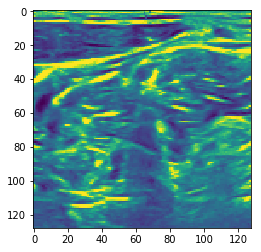

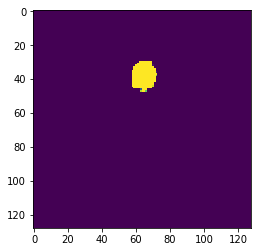

In [59]:
visualise_model()